=== Sales by Category ===
                     QUANTITY        VALUE
ANONYMIZED CATEGORY                       
Category-76             71719  198499343.0
Category-75            151330  181554632.0
Category-120           169715  115506421.0
Category-119            68332   48102774.0
Category-77             28455   36277127.0
Category-91             20853   35729823.0
Category-100            76824   30783426.0
Category-85             22997   20550056.0
Category-101            19585   12227597.0
Category-121            14669   12183700.0
Category-94             23670    7956716.0
Category-92              6954    7514425.0
Category-78              9766    6562538.0
Category-95              4117    5718656.0
Category-84             11933    5045168.0
Category-106             6521    4566978.0
Category-110            10529    4215429.0
Category-83              2436    3508646.0
Category-111             6715    3385923.0
Category-107             2730    3228058.0
Category-108             975

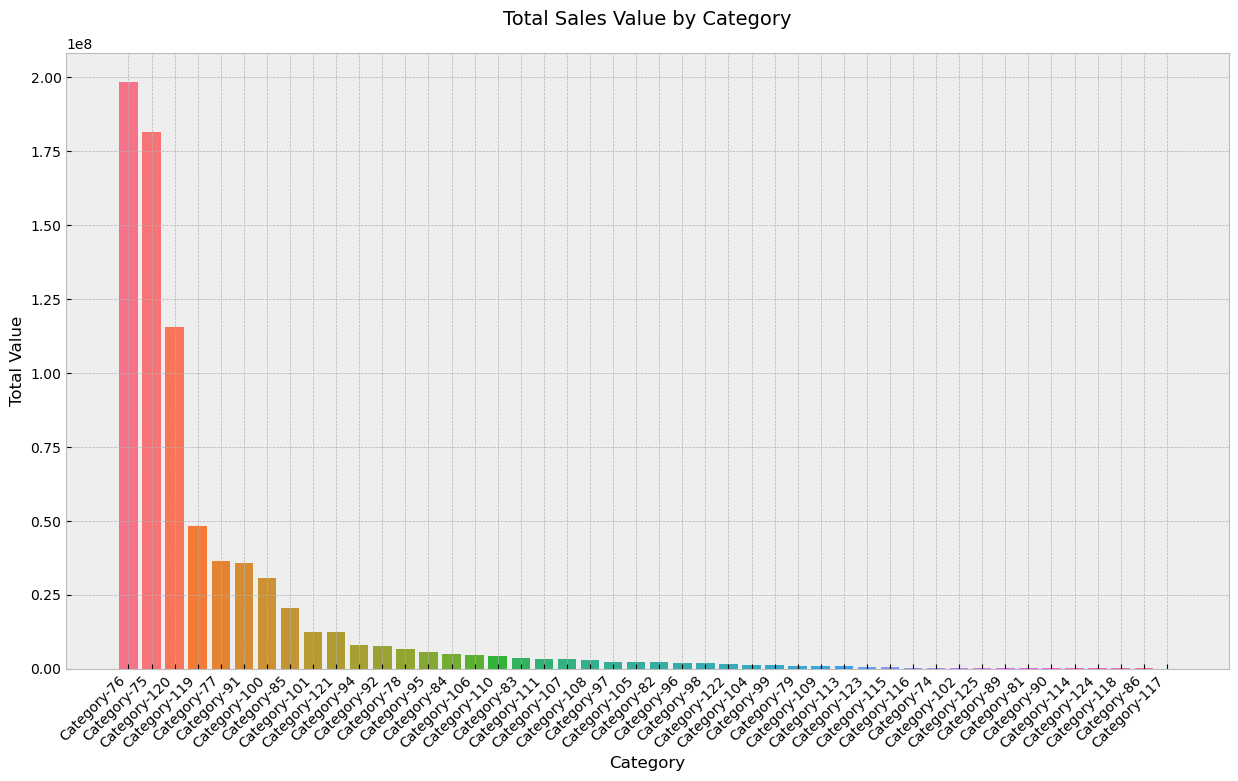

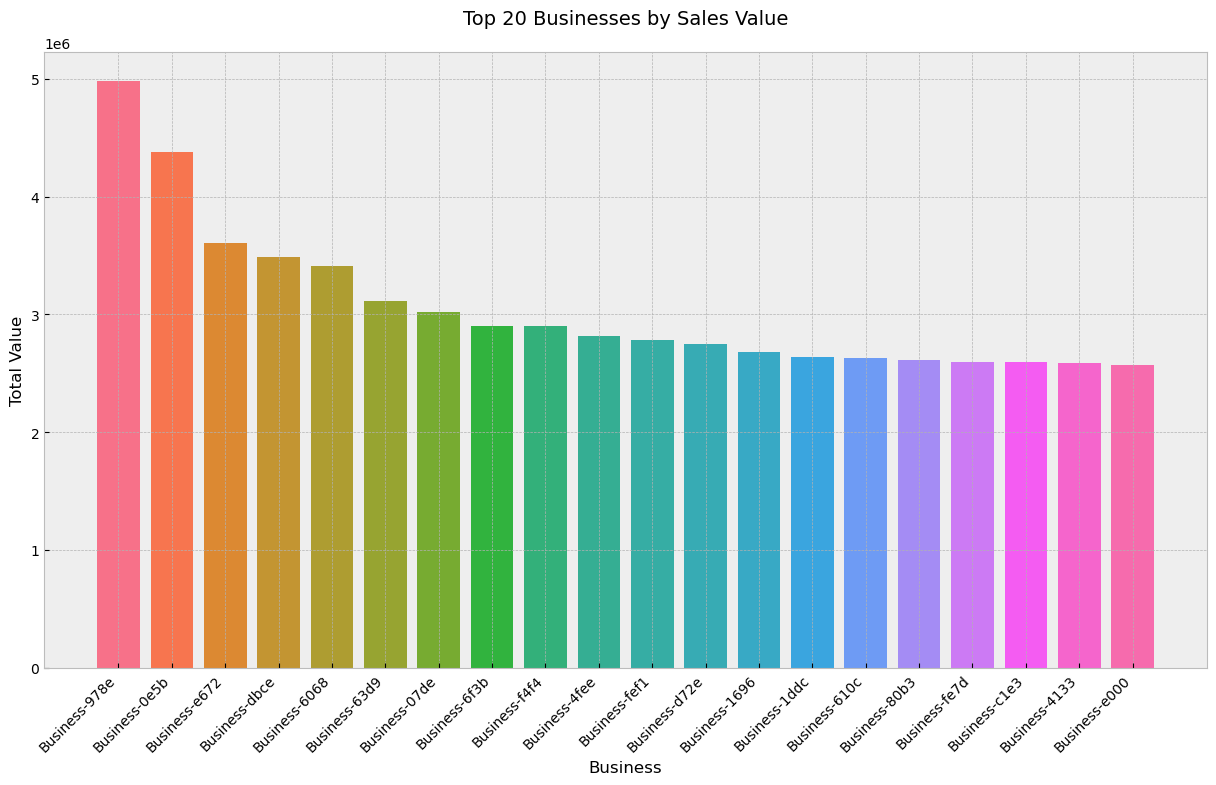

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the cleaned data
df = pd.read_csv('transaction_data_cleaned_and_engineered.csv')

# Set style for better visualizations
plt.style.use('bmh')
sns.set_palette("husl")

# 1. Sales by Anonymized Category
category_sales = df.groupby('ANONYMIZED CATEGORY').agg({
    'QUANTITY': 'sum',
    'VALUE': 'sum'
}).round(2)

# Sort by VALUE in descending order
category_sales = category_sales.sort_values('VALUE', ascending=False)

print("=== Sales by Category ===")
print(category_sales)

# Visualize Category Sales

plt.figure(figsize=(15, 8))
bars = plt.bar(category_sales.index, category_sales['VALUE'], 
               color=sns.color_palette("husl", len(category_sales)))
plt.title('Total Sales Value by Category', fontsize=14, pad=20)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Value', fontsize=12)
plt.xticks(rotation=45, ha='right')


# 2. Sales by Anonymized Business
business_sales = df.groupby('ANONYMIZED BUSINESS').agg({
    'QUANTITY': 'sum',
    'VALUE': 'sum'
}).round(2)

# Sort by VALUE and get top 20 businesses
top_20_business = business_sales.sort_values('VALUE', ascending=False).head(20)

print("\n=== Top 20 Businesses by Sales ===")
print(top_20_business)

# Visualize Top 20 Business Sales

plt.figure(figsize=(15, 8))
bars = plt.bar(range(len(top_20_business)), top_20_business['VALUE'],
               color=sns.color_palette("husl", 20))
plt.title('Top 20 Businesses by Sales Value', fontsize=14, pad=20)
plt.xlabel('Business', fontsize=12)
plt.ylabel('Total Value', fontsize=12)
plt.xticks(range(len(top_20_business)), top_20_business.index, rotation=45, ha='right')

# Additional summary statistics
print("\n=== Summary Statistics ===")
print("\nTotal Sales by Category:")
print(f"Total Quantity: {category_sales['QUANTITY'].sum():,.0f}")
print(f"Total Value: {category_sales['VALUE'].sum():,.2f}")

print("\nTotal Sales by Business:")
print(f"Number of Businesses: {len(business_sales)}")
print(f"Average Sales per Business: {business_sales['VALUE'].mean():,.2f}")

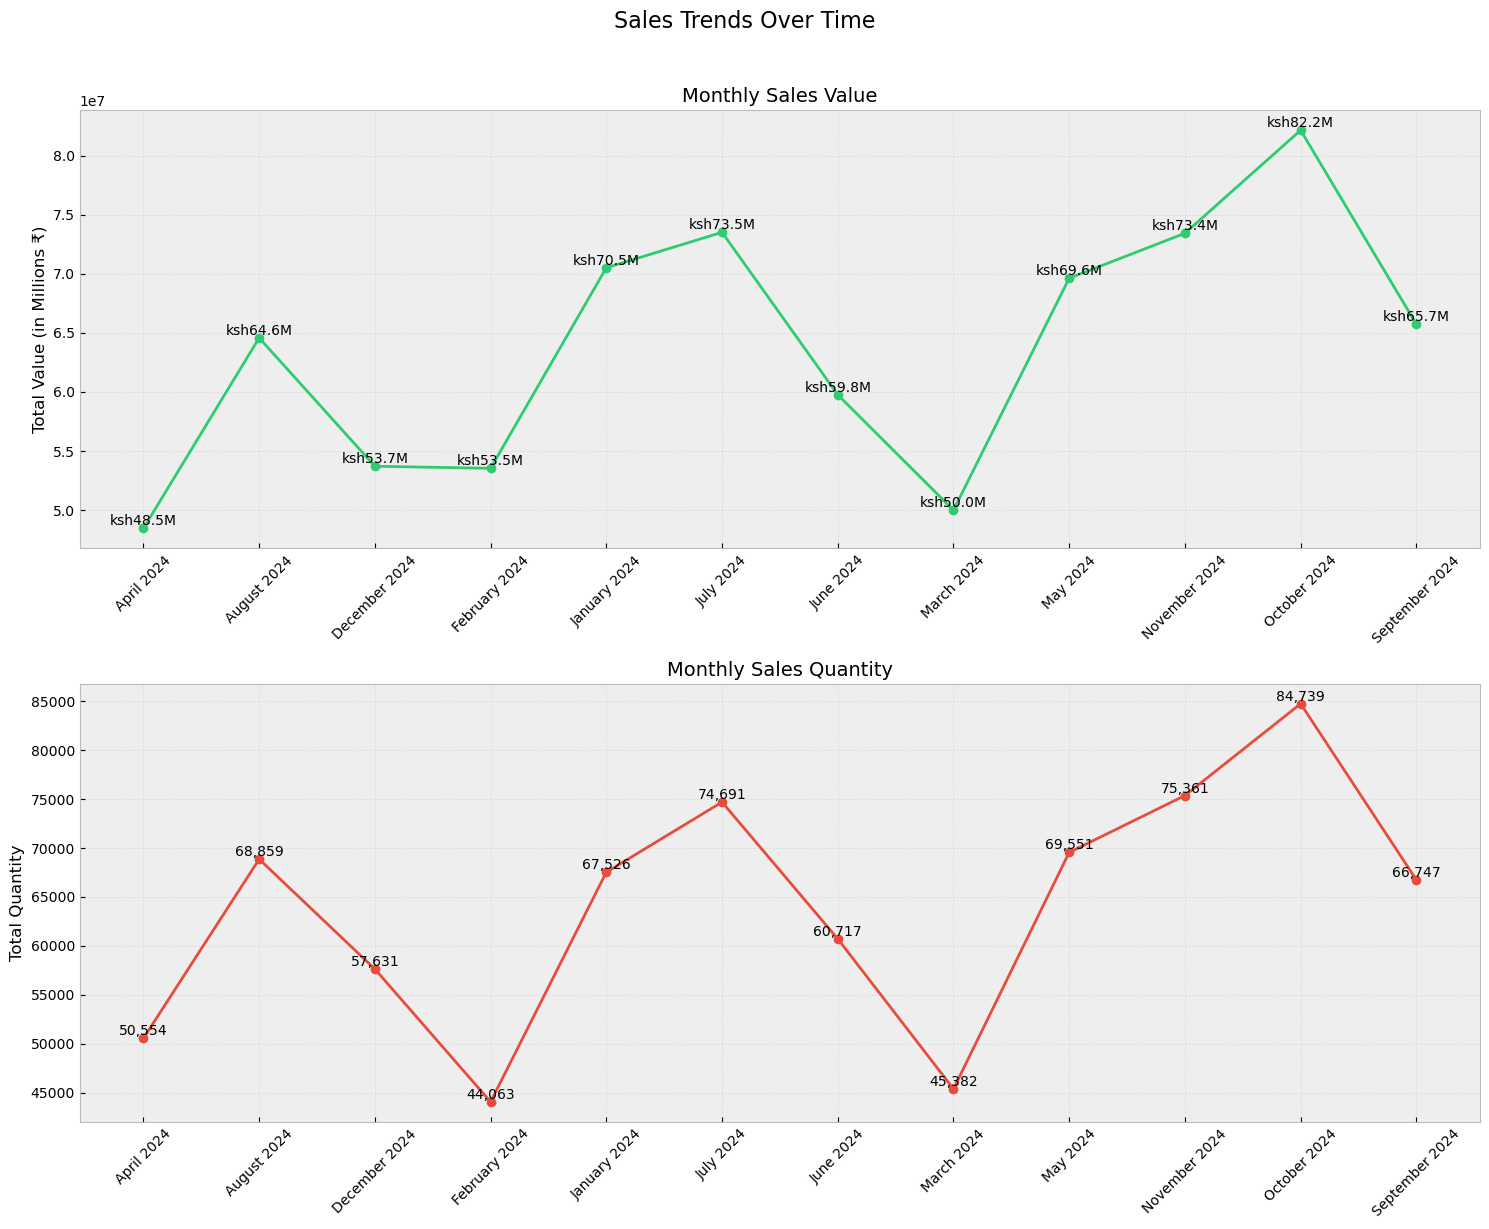


Monthly Sales Summary:

Value Statistics:
count     ksh0.0M
mean     ksh63.7M
std      ksh10.7M
min      ksh48.5M
25%      ksh53.7M
50%      ksh65.2M
75%      ksh71.2M
max      ksh82.2M
Name: VALUE, dtype: object

Quantity Statistics:
count        12
mean     63,818
std      12,518
min      44,063
25%      55,862
50%      67,136
75%      70,836
max      84,739
Name: QUANTITY, dtype: object

Month-over-Month Growth Rates:
    Month-Year  Value_Growth  Quantity_Growth
    April 2024           NaN              NaN
   August 2024         33.28            36.21
 December 2024        -16.83           -16.31
 February 2024         -0.32           -23.54
  January 2024         31.71            53.25
     July 2024          4.26            10.61
     June 2024        -18.70           -18.71
    March 2024        -16.35           -25.26
      May 2024         39.28            53.26
 November 2024          5.46             8.35
  October 2024         11.88            12.44
September 2024        

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_csv('transaction_data_cleaned_and_engineered.csv')

# Group by Month-Year and calculate monthly totals
monthly_sales = df.groupby('Month-Year').agg({
    'QUANTITY': 'sum',
    'VALUE': 'sum'
}).reset_index()

# Function to format values in millions
def format_value(x):
    return f'ksh{x/1e6:.1f}M'

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plot 1: Value Trend
ax1.plot(monthly_sales['Month-Year'], monthly_sales['VALUE'], 
         marker='o', linewidth=2, color='#2ecc71')
ax1.set_title('Monthly Sales Value', fontsize=14)
ax1.set_ylabel('Total Value (in Millions ₹)')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Add value labels
for i, v in enumerate(monthly_sales['VALUE']):
    ax1.text(i, v, format_value(v), ha='center', va='bottom')

# Plot 2: Quantity Trend
ax2.plot(monthly_sales['Month-Year'], monthly_sales['QUANTITY'], 
         marker='o', linewidth=2, color='#e74c3c')
ax2.set_title('Monthly Sales Quantity', fontsize=14)
ax2.set_ylabel('Total Quantity')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# Add quantity labels
for i, v in enumerate(monthly_sales['QUANTITY']):
    ax2.text(i, v, f'{v:,.0f}', ha='center', va='bottom')

# Add main title
plt.suptitle('Sales Trends Over Time', fontsize=16, y=1.02)

# Adjust layout
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nMonthly Sales Summary:")
print("\nValue Statistics:")
print(monthly_sales['VALUE'].describe().apply(format_value))
print("\nQuantity Statistics:")
print(monthly_sales['QUANTITY'].describe().apply(lambda x: f"{x:,.0f}"))

# Calculate month-over-month growth
monthly_sales['Value_Growth'] = monthly_sales['VALUE'].pct_change() * 100
monthly_sales['Quantity_Growth'] = monthly_sales['QUANTITY'].pct_change() * 100

print("\nMonth-over-Month Growth Rates:")
growth_summary = monthly_sales[['Month-Year', 'Value_Growth', 'Quantity_Growth']].round(2)
print(growth_summary.to_string(index=False))


=== Top 5 Most Frequently Purchased Products ===

Based on Total Quantity Sold:
ANONYMIZED PRODUCT
Product-66e0    46,957
Product-e805    42,602
Product-8f75    37,566
Product-29ee    35,940
Product-4156    28,487
Name: QUANTITY, dtype: object

=== Top 5 Most Valuable Products ===

Based on Total Value:
ANONYMIZED PRODUCT
Product-e805    Ksh151,785,307.00
Product-8f75     Ksh63,007,630.00
Product-66e0     Ksh27,880,230.00
Product-2175     Ksh24,141,325.00
Product-d09c     Ksh24,020,717.00
Name: VALUE, dtype: object


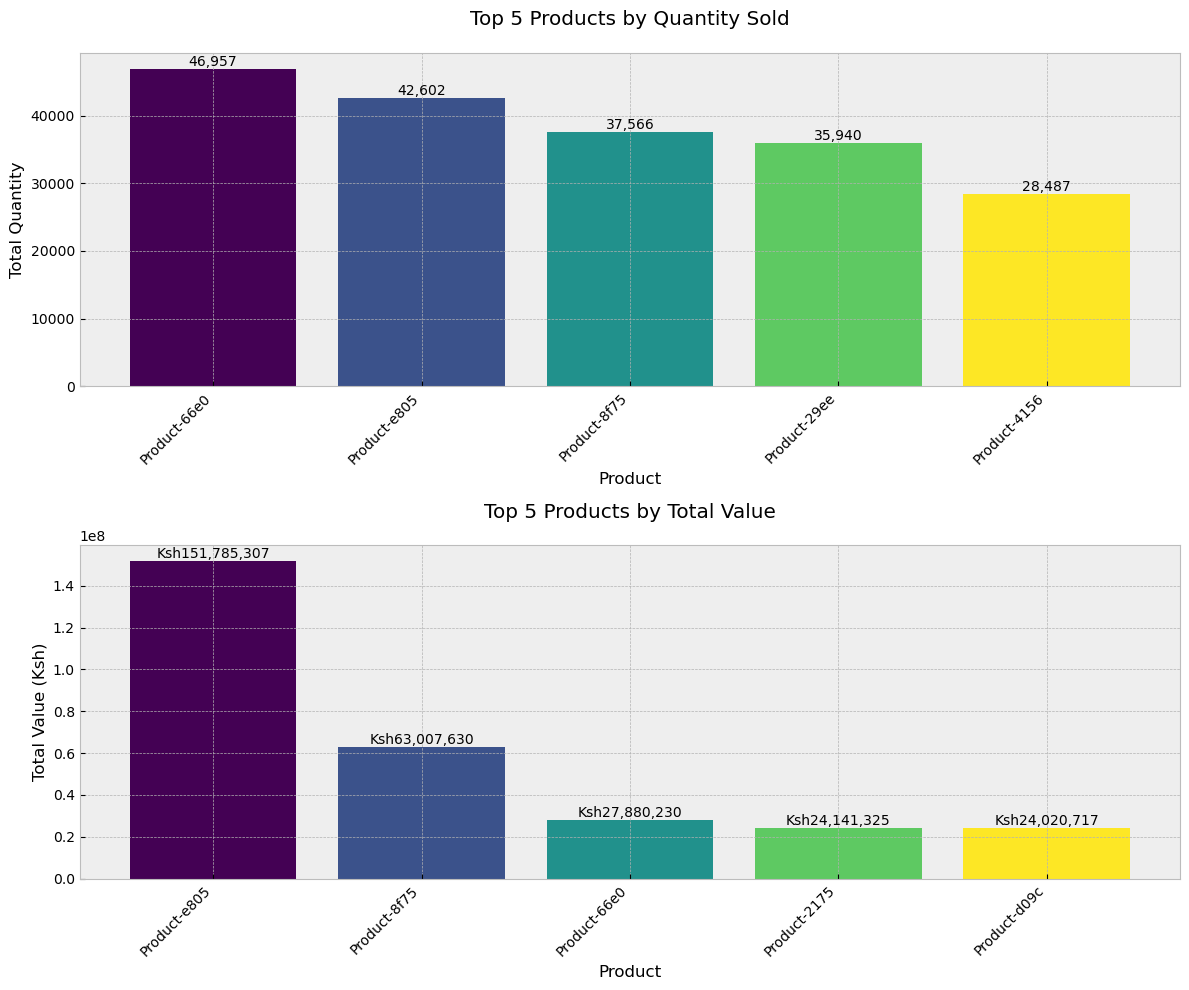


=== Additional Insights ===

Percentage Contribution to Total Quantity:
Product-66e0: 6.13%
Product-e805: 5.56%
Product-8f75: 4.91%
Product-29ee: 4.69%
Product-4156: 3.72%

Percentage Contribution to Total Value:
Product-e805: 19.84%
Product-8f75: 8.24%
Product-66e0: 3.64%
Product-2175: 3.16%
Product-d09c: 3.14%


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate product performance metrics
product_performance = df.groupby('ANONYMIZED PRODUCT').agg({
    'QUANTITY': 'sum',
    'VALUE': 'sum'
}).round(2)

# Get top 5 by quantity
top_5_quantity = product_performance.nlargest(5, 'QUANTITY')
print("\n=== Top 5 Most Frequently Purchased Products ===")
print("\nBased on Total Quantity Sold:")
print(top_5_quantity['QUANTITY'].apply(lambda x: f"{x:,.0f}"))

# Get top 5 by value 
top_5_value = product_performance.nlargest(5, 'VALUE')
print("\n=== Top 5 Most Valuable Products ===")
print("\nBased on Total Value:")
print(top_5_value['VALUE'].apply(lambda x: f"Ksh{x:,.2f}"))

# Create subplots for visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot top 5 by quantity using matplotlib instead of seaborn
bars1 = ax1.bar(range(len(top_5_quantity)), top_5_quantity['QUANTITY'], 
                color=plt.cm.viridis(np.linspace(0, 1, 5)))
ax1.set_title('Top 5 Products by Quantity Sold', pad=20)
ax1.set_xlabel('Product')
ax1.set_ylabel('Total Quantity')
ax1.set_xticks(range(len(top_5_quantity)))
ax1.set_xticklabels(top_5_quantity.index, rotation=45, ha='right')

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,.0f}',
             ha='center', va='bottom')

# Plot top 5 by value
bars2 = ax2.bar(range(len(top_5_value)), top_5_value['VALUE'], 
                color=plt.cm.viridis(np.linspace(0, 1, 5)))
ax2.set_title('Top 5 Products by Total Value', pad=20)
ax2.set_xlabel('Product')
ax2.set_ylabel('Total Value (Ksh)')
ax2.set_xticks(range(len(top_5_value)))
ax2.set_xticklabels(top_5_value.index, rotation=45, ha='right')

# Add value labels on bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'Ksh{height:,.0f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Additional insights
print("\n=== Additional Insights ===")

# Calculate percentage contribution
print("\nPercentage Contribution to Total Quantity:")
total_quantity = product_performance['QUANTITY'].sum()
for product in top_5_quantity.index:
    pct = (top_5_quantity.loc[product, 'QUANTITY'] / total_quantity * 100)
    print(f"{product}: {pct:.2f}%")

print("\nPercentage Contribution to Total Value:")
total_value = product_performance['VALUE'].sum()
for product in top_5_value.index:
    pct = (top_5_value.loc[product, 'VALUE'] / total_value * 100)
    print(f"{product}: {pct:.2f}%")